# Convolution

## Um was geht es?

### Allgemein
In diesem Notebook wollen wir uns die namensgebende Operation des Convolutional Neural Networks anschauen.
Die Operation wird häufig auch als Faltung bezeichnet und ist eine klassische Operation, welche in der Computergraphik und der Signalverarbeitung eine lange Tradition aufweist.

### Operation
Es handelt sich, mathematisch betrachtet, dabei um eine Operation, welche aus 2 gegebenen Funktionen (Signal, Filter) eine neue Funktion generiert, die jedem Signalpunkt einen neuen Wert zuweist. Was das heißt, schauen wir uns am Beispiel an :)

### Beispiele:
<b>Klassisches Signal (1D)</b><br />
Hier schauen wir uns den klassischen Signalfall an. Hierbei ist unser Signal eine Funktion, welche sich über die Zeit verändert. In der gezeigten Animation ist dies ein Rechtecksignal (Blau), welches entweder voll aktiv ist, oder garnicht aktiv ist. Der Filter ist dabei selbst auch ein Rechteck-Signal (Rot)
![Convolution Signal mit sich selbst](conv_self_conv.gif)
Diese spezielle Form wird auch häufig als Autocorrelation oder Selbstkonvolution bezeichnet, da das Signal mit sich selbst zu einem früheren Zeitpunkt verglichen wird (Hier: Rechteck mit Rechteck). Das drückt damit eine Selbstähnlichkeit aus. Damit kann man beispielsweise zyklen in Signalen finden und dadurch Anonamlien erkennen.

In unserem Fall arbeiten wir mit zweidimensionalen "Signalen", nämlich Bilern und Kernels. Das Prinzip bleibt aber wieder dasselbe: Wir schauen wie sehr der Kern (in dem Fall eine Matrix, auch Faltungsmatrix genannt) an eine bestimmte Stelle im Bild passt.<br />

<b>2D-Bild Signal</b><br />
![2D Convolution](conv_2d.gif)
Diese Art der Konvolution werden wir durchführen. Beachte, dass die Operation komplett analog zum 1D-Fall ist. 
Beachte auch, dass das Ausgabe-Bild in diesem Beispiel etwas kleinere Ausmaße hat, als das Eingangsbild, da wir den Rand auslassen.

<u>Viel Spaß</u> :)

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

In [282]:
def convolution_operation(picture: np.ndarray, kernel: np.ndarray, normalization_factor: float=1.) -> np.ndarray:
    """
    This function should  use the kernel 
    :param kernel: n*m matrix that should be used as filter
    :param picture: k*i image in gryscale (No Color channels!)
    :param normalization_factor: Result for point will be normalized with that value. 1 Means no normalization
    """
    
    # Check some preconditions so the function is used correctly
    assert isinstance(picture, np.ndarray) and isinstance(kernel, np.ndarray), "Please use numpy matrices as input!"
    assert len(picture.shape) == 2 and len(kernel.shape) == 2, "Please provide 2 Dimensional matrices"
    assert kernel.shape[0] <= picture.shape[0] and kernel.shape[1] <= picture.shape[1], "Kernels cannot have greater dimensions then picture!"
    
    # Implementation part
    
    # Step_1 get width and height for kernel and picture into 4 Variables
    # pic_width, pic_height, kernel_width, kernel_height
    pic_height, pic_width = picture.shape
    kernel_height, kernel_width = kernel.shape
    
    # calculate dimensions of output matrix dimensions
    # That means: how often we can move the filter over the image until we touch the edges)
    # Store the dimensions into output_width, output height
    output_width = pic_width - kernel_width + 1
    output_height = pic_height - kernel_height + 1
    
    # Generate empty numpy matrix (array) with random values that will be used as output
    # store it into output_matrix
    output_matrix = np.zeros((output_height, output_width), dtype=np.float32)
    
    
    # use ur kernel to calculate output
    # this should be 2 loops that loop over the output dimension (y, x) and use the kernel at that point
    # in the loop body you have to "cut" the relevant part (y+kernel_height, x+kernel_height) and pointwise multiply
    # it with the kernel. Multiply it with the normalization_factor at the end 
    # You can use numpy multiply function for that or code your own :)
    for y in range(output_height):
        for x in range(output_width):
            relevant_part = picture[y:y + kernel_height, x:x + kernel_width]

            res = np.sum(np.multiply(relevant_part, kernel)) * normalization_factor
            output_matrix[y,x] = res
            
    return output_matrix

## Aufgaben
- Lies' die Einleitung
- Implementiere den Funktionsstumpf der Funktion convolution_operation
- Finde im Netz verschiedene Filtermatritzen (Schärfung, Kanten, Sobel, Eigene?) und wende Sie auf einem selbst gewählten Bild an. Dazu musst Du das Bild natürlich vorher laden :)


Code um die implementierte Funktion zu testen

In [283]:
# 1. Rauschbild generieren
test_image = np.random.rand(512, 256)

# Gaussian Kernel (Glässtungsfilter) -> 3x3 Matrix bestehend aus 1 in jedem Feld definieren
gaussian_kernel = np.ones(shape=(3, 3), dtype=np.float32)
print("Kernel Matrix: \n", gaussian_kernel)

Kernel Matrix: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


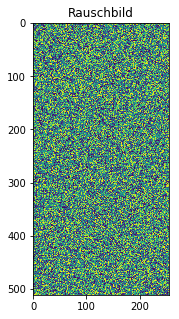

In [284]:
# 2. Rauschbild ausgeben
fix, ax = plt.subplots(1, 1, figsize=(5,5))
plt.imshow(test_image)
_ = plt.title("Rauschbild")

In [285]:
# 3. Funktion mit gaussian Kern anwenden
smoothed_test_image = convolution_operation(picture=test_image, 
                                            kernel=gaussian_kernel, 
                                            normalization_factor=1./9.)

In [286]:
# 4. Entstandenes Filterbild (Filter Response) ausgeben

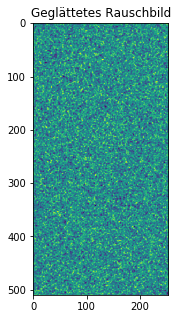

In [287]:
fix, ax = plt.subplots(1, 1, figsize=(5,5))
plt.imshow(smoothed_test_image)
_ = plt.title("Geglättetes Rauschbild")

Code für eigene Bilder

In [288]:
def load_image_bw(file: str) -> np.ndarray:
    """
    Lädt das Bild in schwarz-weiß
    """
    return scipy.misc.imread(file, flatten=True, mode='F')

In [289]:
cat_img = load_image_bw(file="test_img.jpg")

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [290]:
print("Input shape: ", cat_img.shape)

Input shape:  (383, 510)


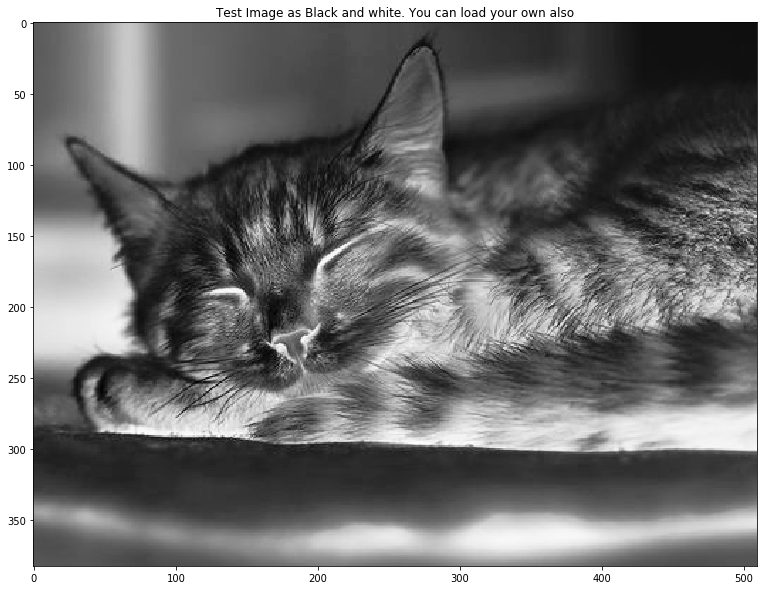

In [291]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
_ = plt.imshow(cat_img, cmap="Greys")
_ = plt.title("Test Image as Black and white. You can load your own also")

In [292]:
# Benutze deine eigene Matrix auf das Bild, hier das Beispiel mit Gaussian Kern wie oben
your_kernel = gaussian_kernel

In [293]:
smoothed_cat_image = convolution_operation(picture=cat_img, kernel=your_kernel, normalization_factor=1./9.)

In [294]:
print("Filtered Image shape", smoothed_cat_image.shape)

Filtered Image shape (381, 508)


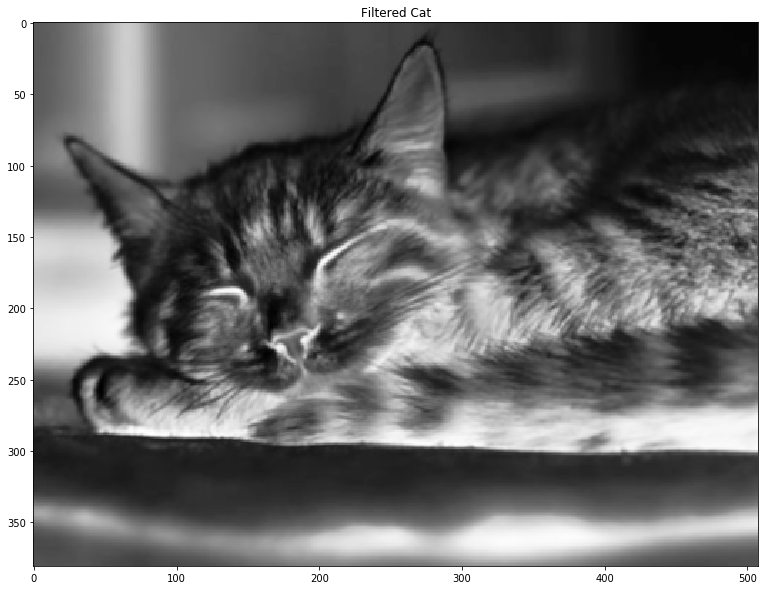

In [295]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
_ = plt.imshow(smoothed_cat_image, cmap="Greys")
_ = plt.title("Filtered Cat")